In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools

In [2]:
df1 = pd.read_csv('./data/data2D.csv',header=None)
df1.columns = ['V1', 'V2']
df2 = pd.read_csv('./data/data1000D.csv',header=None)
df2.columns = ['V'+str(i) for i in range(1,1001)]

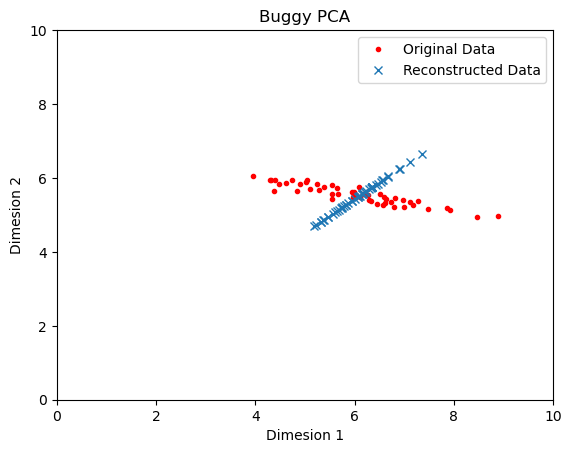

In [48]:
U1, s1, V1 = np.linalg.svd(df1, full_matrices=False)
V1 = V1[0,:]
df1_pca = np.dot(df1,V1.T)
df1_recon = np.outer(df1_pca,V1)
df1_err = np.sum((df1-df1_recon)**2)
df1_err = np.sum(df1_err) / df1.shape[0]

plt.figure()
plt.plot(df1['V1'],df1['V2'],'.', color='red', label='Original Data')
plt.plot(df1_recon[:,0],df1_recon[:,1],'x',  label='Reconstructed Data')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.xlabel('Dimesion 1')
plt.ylabel('Dimesion 2')
plt.title('Buggy PCA')
plt.show()

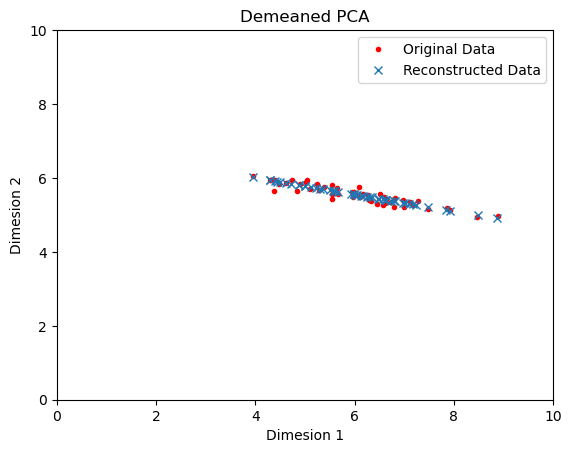

In [49]:
df1_mean = np.mean(df1,axis=0)
df1_demean = df1 - df1_mean
U1_demean, s1_demean, V1_demean = np.linalg.svd(df1_demean, full_matrices=False)
V1_demean = V1_demean[0,:]
df1_demean_pca = np.dot(df1_demean,V1_demean)
df1_demean_recon = np.outer(df1_demean_pca,V1_demean)
df1_demean_recon = df1_demean_recon + np.full(df1_demean_recon.shape,df1_mean)
df1_demean_err = np.sum((df1_demean_recon-df1)**2)
df1_demean_err = np.sum(df1_demean_err) / df1.shape[0]

plt.figure()
plt.plot(df1['V1'],df1['V2'],'.', color='red', label='Original Data')
plt.plot(df1_demean_recon[:,0],df1_demean_recon[:,1],'x', label='Reconstructed Data')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.xlabel('Dimesion 1')
plt.ylabel('Dimesion 2')
plt.title('Demeaned PCA')
plt.show()

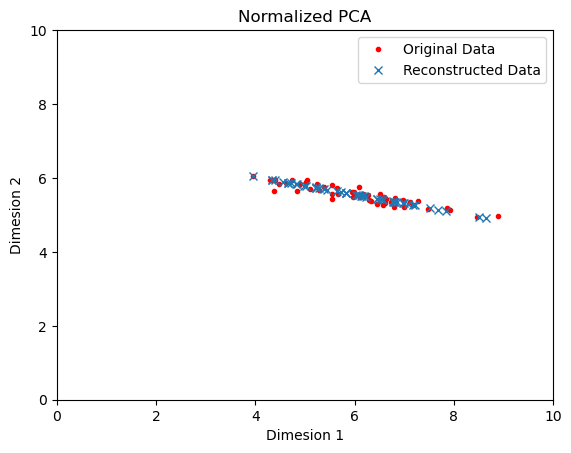

In [50]:
df1_mean = np.mean(df1,axis=0)
df1_std = np.std(df1,axis=0)
df1_demean_scale = (df1 - df1_mean) / df1_std
U1_demean_scale, s1_demean_scale, V1_demean_scale = np.linalg.svd(df1_demean_scale, full_matrices=False)
V1_demean_scale = V1_demean_scale[0,:]
df1_demean_scale_pca = np.dot(df1_demean_scale,V1_demean_scale)
df1_demean_scale_recon = np.outer(df1_demean_scale_pca,V1_demean_scale)
df1_demean_scale_recon = df1_demean_scale_recon * np.full(df1_demean_scale_recon.shape,df1_std)
df1_demean_scale_recon = df1_demean_scale_recon + np.full(df1_demean_scale_recon.shape,df1_mean)
df1_demean_scale_err = np.sum((df1_demean_scale_recon-df1)**2)
df1_demean_scale_err = np.sum(df1_demean_scale_err) / df1.shape[0]

plt.figure()
plt.plot(df1['V1'],df1['V2'],'.', color='red', label='Original Data')
plt.plot(df1_demean_scale_recon[:,0],df1_demean_scale_recon[:,1],'x', label='Reconstructed Data')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.xlabel('Dimesion 1')
plt.ylabel('Dimesion 2')
plt.title('Normalized PCA')
plt.show()

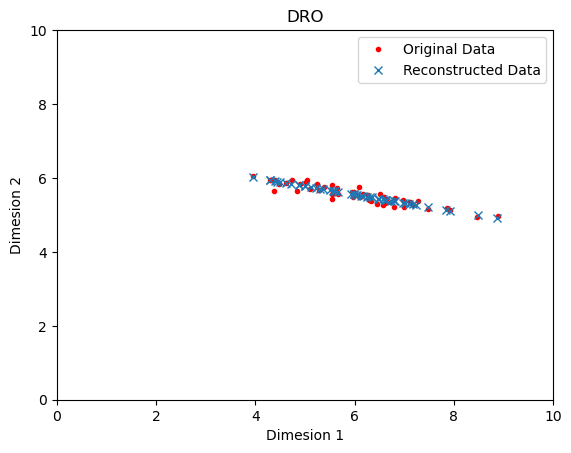

In [51]:
df1_mean = np.mean(df1,axis=0)
df1_demean = df1 - df1_mean
U1_demean, s1_demean, V1_demean = np.linalg.svd(df1_demean, full_matrices=False)
z = U1_demean[:,0:1] * np.sqrt(df1_demean.shape[0])
A = V1_demean[0:1,:] * s1_demean[0:1] / np.sqrt(df1_demean.shape[0])
df1_demean_recon = np.dot(z,A) + np.full(df1_demean_scale_recon.shape,df1_mean)
df1_demean_err_dro = np.sum((df1_demean_recon-df1)**2)
df1_demean_err_dro = np.sum(df1_demean_err_dro) / df1.shape[0]

plt.figure()
plt.plot(df1['V1'],df1['V2'],'.', color='red', label='Original Data')
plt.plot(df1_demean_recon[:,0],df1_demean_recon[:,1],'x', label='Reconstructed Data')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.xlabel('Dimesion 1')
plt.ylabel('Dimesion 2')
plt.title('DRO')
plt.show()

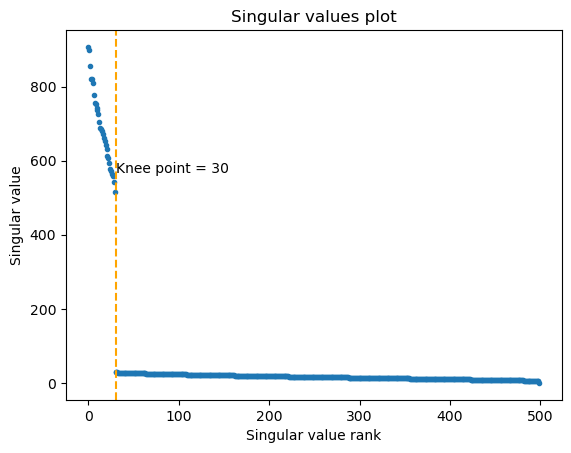

In [52]:
df2_demean = df2 - np.mean(df2,axis=0)
U2_demean, s2_demean, V2_demean = np.linalg.svd(df2_demean, full_matrices=False)
knee_point = 30

plt.figure()
plt.plot(s2_demean,'.')
plt.xlabel('Singular value rank')
plt.ylabel('Singular value')
plt.title('Singular values plot')
plt.axvline(x=knee_point, color='orange', linestyle='--')
plt.annotate('Knee point = 30', xy=(knee_point, s2_demean[knee_point-1]), xytext=(knee_point, s2_demean[knee_point-1]*1.1))

plt.show()

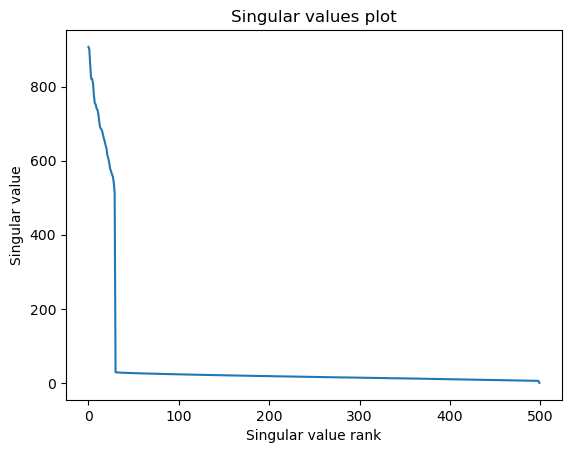

In [36]:
plt.figure()
plt.plot(s2_demean)
plt.xlabel('Singular value rank')
plt.ylabel('Singular value')
plt.title('Singular values plot')
plt.show()

In [38]:
print('Reconstruction error: 2D dataset (buggy PCA): ',df1_err)
print('Reconstruction error: 2D dataset (demeaned PCA): ',df1_demean_err)
print('Reconstruction error: 2D dataset (normalized PCA): ',df1_demean_scale_err)
print('Reconstruction error: 2D dataset (DRO): ',df1_demean_err_dro)

Reconstruction error: 2D dataset (buggy PCA):  0.8869030837347941
Reconstruction error: 2D dataset (demeaned PCA):  0.010006085628512911
Reconstruction error: 2D dataset (normalized PCA):  0.049472083454770666
Reconstruction error: 2D dataset (DRO):  0.010006085628512911


In [39]:
U2, s2, V2 = np.linalg.svd(df2, full_matrices=False)
V2 = V2[0:30,:]
df2_pca = np.dot(df2,V2.T)
df2_recon = np.dot(df2_pca,V2)
df2_err = np.sum((df2-df2_recon)**2)
df2_err = np.sum(df2_err) / df2.shape[0]

In [40]:
df2_mean = np.mean(df2,axis=0)
df2_demean = df2 - df2_mean
U2_demean, s2_demean, V2_demean = np.linalg.svd(df2_demean, full_matrices=False)
V2_demean = V2_demean[0:30,:]
df2_demean_pca = np.dot(df2_demean,V2_demean.T)
df2_demean_recon = np.dot(df2_demean_pca,V2_demean)
df2_demean_recon = df2_demean_recon + np.full(df2_demean_recon.shape,df2_mean)
df2_demean_err = np.sum((df2_demean_recon-df2)**2)
df2_demean_err = np.sum(df2_demean_err) / df2.shape[0]

In [41]:
df2_mean = np.mean(df2,axis=0)
df2_std = np.std(df2,axis=0)
df2_demean_scale = (df2 - df2_mean) / df2_std
U2_demean_scale, s2_demean_scale, V2_demean_scale = np.linalg.svd(df2_demean_scale, full_matrices=False)
V2_demean_scale = V2_demean_scale[0:30,:]
df2_demean_scale_pca = np.dot(df2_demean_scale,V2_demean_scale.T)
df2_demean_scale_recon = np.dot(df2_demean_scale_pca,V2_demean_scale)
df2_demean_scale_recon = df2_demean_scale_recon * np.full(df2_demean_scale_recon.shape,df2_std)
df2_demean_scale_recon = df2_demean_scale_recon + np.full(df2_demean_scale_recon.shape,df2_mean)
df2_demean_scale_err = np.sum((df2_demean_scale_recon-df2)**2)
df2_demean_scale_err = np.sum(df2_demean_scale_err) / df2.shape[0]

In [42]:
df2_mean = np.mean(df2,axis=0)
df2_demean = df2 - df2_mean
U2_demean, s2_demean, V2_demean = np.linalg.svd(df2_demean, full_matrices=False)
z = U2_demean[:,0:30] * np.sqrt(df2_demean.shape[0])
A = np.dot(V2_demean[0:30,:].T,np.diag(s2_demean[0:30])) / np.sqrt(df2_demean.shape[0])
df2_demean_recon = (np.dot(A,z.T) + np.full(df2_demean_scale_recon.shape,df2_mean).T).T
df2_demean_err_dro = np.sum((df2_demean_recon-df2)**2)
df2_demean_err_dro = np.sum(df2_demean_err_dro) / df2.shape[0]

In [43]:
print('Reconstruction error: 1000D dataset (buggy PCA): ',df2_err)
print('Reconstruction error: 1000D dataset (demeaned PCA): ',df2_demean_err)
print('Reconstruction error: 1000D dataset (normalized PCA): ',df2_demean_scale_err)
print('Reconstruction error: 1000D dataset (DRO): ',df2_demean_err_dro)

Reconstruction error: 1000D dataset (buggy PCA):  802.7313986203584
Reconstruction error: 1000D dataset (demeaned PCA):  273.0459589786028
Reconstruction error: 1000D dataset (normalized PCA):  273.62858099762326
Reconstruction error: 1000D dataset (DRO):  273.04595897860275
